In [1]:
import numpy as np
from scipy.integrate import quad
from ler import LeR
import json
import matplotlib.pyplot as plt
%matplotlib inline

# for generating mass distribution
from gwcosmo import priors as p

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1
/Users/phurailatpamhemantakumar/anaconda3/envs/lal/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


## BNS mass model chosen

In [17]:
param = dict(mminns=1.0,mmaxns=3.0,alphans=0.0)
model = p.mass_prior("BNS", param)
m1,m2 = model.sample(Nsample=10000)

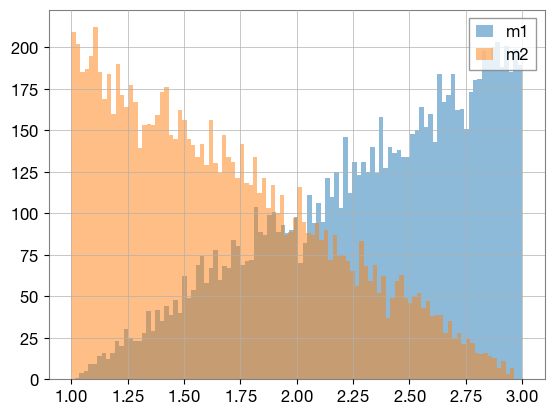

In [19]:
# hist plot of m1 and m2
plt.hist(m1, bins=100, alpha=0.5, label='m1')
plt.hist(m2, bins=100, alpha=0.5, label='m2')
plt.legend(loc='upper right')
plt.show()

In [2]:
ler = LeR(npool=int(4),z_min=0., z_max=5., batch_size=25000,
    m_min=1., 
    m_max=3.,
    event_type='BNS',
    spin_zero=True,
    mtot_min=2., 
    mtot_max=18., 
    nsamples_mtot=50, 
    nsamples_mass_ratio=100, 
    sampling_frequency=2048.,
    waveform_approximant = 'TaylorF2', 
    minimum_frequency = 20., 
    snr_type = 'interpolation', 
    waveform_inspiral_must_be_above_fmin=False,
    interpolator_dir="../interpolator_pickle")

Given: Inspiral waveform, TaylorF2.
psds not given. Choosing bilby's default psds
given psds:  {'L1': 'aLIGO_O4_high_asd.txt', 'H1': 'aLIGO_O4_high_asd.txt', 'V1': 'AdV_asd.txt'}
Interpolator will be loaded for L1 detector from ../interpolator_pickle/L1/halfSNR_dict_1.pickle
Interpolator will be loaded for H1 detector from ../interpolator_pickle/H1/halfSNR_dict_1.pickle
Interpolator will be loaded for V1 detector from ../interpolator_pickle/V1/halfSNR_dict_1.pickle


In [23]:
# sample unlensed parameters
ler.batch_size = 50000
ler.unlensed_cbc_statistics(nsamples=1000000, json_file="./unlensed_params_BNS.json");

chosen batch size = 50000. If you want to change batch size, self.batch_size = new_size
There will be 20 batche(s)
resuming from ./unlensed_params_BNS.json


In [24]:
# sample lensed parameters
lensed_param = ler.lensed_cbc_statistics(nsamples=1000000, json_file="./lensed_params_BNS.json", resume=True);

chosen batch size = 50000. If you want to change batch size, self.batch_size = new_size
There will be 20 batche(s)
resuming from ./lensed_params_BNS.json
Batch no. 15
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:11<00:00, 4517.10it/s]


calculating snrs...
Batch no. 16
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:10<00:00, 4606.17it/s]


calculating snrs...
Batch no. 17
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:10<00:00, 4600.42it/s]


calculating snrs...
Batch no. 18
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:10<00:00, 4600.02it/s]


calculating snrs...
Batch no. 19
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:10<00:00, 4633.84it/s]


calculating snrs...
Batch no. 20
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:10<00:00, 4607.06it/s]


calculating snrs...


### 2 image should cross $SNR_{th}=8.$ 

In [25]:
# rates
unlensed_rate = ler.unlensed_rate(gw_param='./unlensed_params_BNS.json',
    snr_threshold=8.0,
    jsonfile='./unlensed_params_detectable_BNS.json',)

getting gw_params from json file ./unlensed_params_BNS.json...
total unlensed rate (yr^-1) (with step function): 6.89961206671927
storing detectable unlensed params in ./unlensed_params_detectable_BNS.json


In [31]:
# lensed rates
lensed_rate = ler.lensed_rate(lensed_param='./lensed_params_BNS.json',
    jsonfile='./lensed_params_detectable_BNS.json',)

getting lensed_param from json file ./lensed_params_BNS.json...
total lensed rate (yr^-1) (with step function): 0.005976169480649098
storing detectable lensed params in ./lensed_params_detectable_BNS.json...


In [27]:
ler.rate_comparision();

unlensed_rate: 6.89961206671927
lensed_rate: 0.005976169480649098
ratio: 1154.5208162285708


In [34]:
# get dict data from json file
with open('./lensed_params_detectable_BNS.json') as f:
    data = json.load(f)

# arrange in decending order across each row of snr
data['opt_snr_net'] = np.array(data['opt_snr_net'])
data['opt_snr_net'] = np.sort(data['opt_snr_net'], axis=1)
data['opt_snr_net'] = data['opt_snr_net'][:, ::-1]

In [36]:
data['opt_snr_net'][:,3]

array([3.21983671, 0.86632173, 3.31124818, 1.41207904,
       1.77312455, 0.72592022, 0.63644057, 1.47174437,
       0.26222465, 5.36541924, 0.64986355, 1.92021134,
       0.90886806, 0.53657549, 1.43721064, 1.28525603,
       0.75955743, 2.5910121 , 0.96668198, 0.7703515 ,
       4.41560372, 2.31679515, 3.2081344 , 0.93233389,
       0.55462202, 8.50490334, 5.37397886, 2.66190188,
       3.37439872, 0.65184283, 1.69495965, 2.04039097,
       2.98907329, 0.68203055, 1.49714294, 1.31431055,
       0.4977581 , 0.54468499, 1.32110333, 2.07025037,
       0.9087773 , 1.24657444, 3.10159494, 1.66216086,
       0.91946241, 1.21028695, 1.43182991, 2.01207847,
       7.49770083, 1.99973595, 3.14782772, 4.45139369,
       0.45150182, 2.0977456 , 5.27402745, 4.41341438,
       2.15222908, 2.8374864 , 1.2787092 , 3.15569015,
       1.9504071 , 0.72176442, 2.66564301, 2.37185193,
       2.63182903, 5.81872414, 1.46752055, 1.96939014])

* there are no 4 images crossing the threshold

### 4 image should cross $SNR_{th}=8.$ 

In [37]:
# lensed rates
lensed_rate = ler.lensed_rate(lensed_param='./lensed_params_BNS.json',
    jsonfile='./lensed_params_detectable_BNS.json',
    snr_threshold=8.0,
    num_img=4,)

getting lensed_param from json file ./lensed_params_BNS.json...
total lensed rate (yr^-1) (with step function): 0.0
storing detectable lensed params in ./lensed_params_detectable_BNS.json...


In [38]:
# get dict data from json file
with open('./lensed_params_detectable_BNS.json') as f:
    data = json.load(f)

len(data['mass_1'])

0

## $SNR_{th}=4.$ 

In [39]:
# rates
unlensed_rate = ler.unlensed_rate(gw_param='./unlensed_params_BNS.json',
    snr_threshold=4.0,
    jsonfile='./unlensed_params_detectable_BNS.json',)

getting gw_params from json file ./unlensed_params_BNS.json...
total unlensed rate (yr^-1) (with step function): 53.29700335596191
storing detectable unlensed params in ./unlensed_params_detectable_BNS.json


In [40]:
# lensed rates
lensed_rate = ler.lensed_rate(lensed_param='./lensed_params_BNS.json',
    jsonfile='./lensed_params_detectable_BNS.json',
    snr_threshold=4.0,
    num_img=2,)

getting lensed_param from json file ./lensed_params_BNS.json...
total lensed rate (yr^-1) (with step function): 0.06679248243078403
storing detectable lensed params in ./lensed_params_detectable_BNS.json...


In [42]:
ler.rate_comparision();

unlensed_rate: 53.29700335596191
lensed_rate: 0.06679248243078403
ratio: 797.9491316435608
